In [2]:
import datetime
import numpy as np
import pandas_datareader.data as web
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import math
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
tickers="REAINTRATREARAT10Y"
start=datetime.datetime(1930,1,1)
real_interest=web.DataReader(tickers,'fred', start)
cpi=web.DataReader("CPIAUCSL",'fred', start)


In [3]:
cpi

,CPIAUCSL
DATE,
1947-01-01,21.480
1947-02-01,21.620
1947-03-01,22.000
1947-04-01,22.000
1947-05-01,21.950
...,...
2023-10-01,307.531
2023-11-01,308.024
2023-12-01,308.742


In [15]:
control=pd.merge(real_interest, cpi, left_index=True, right_index=True).dropna()

file_path = 'Prices (1).xlsx'

# Name of the sheet to read
sheet_name = 'Daily'

# Read the Excel file for the specific sheet
price = pd.read_excel(file_path, sheet_name=sheet_name)
price.set_index("Date", inplace=True)
modelo=pd.merge(control, price, left_index=True, right_index=True).dropna()

print(modelo)

modelo["log CPIAUCSL"]=modelo['CPIAUCSL'].apply(lambda x:math.log(x,  2.71828))
modelo["log Price"]=modelo['Price'].apply(lambda x:math.log(x,  2.71828))
modelo.reset_index(inplace=True)

# Extract month and year into new columns
modelo['month_year'] = modelo['index'].dt.to_period('M')
#df2['month_year'] = df2['date'].dt.to_period('M')
modelo

            REAINTRATREARAT10Y  CPIAUCSL    Price
1982-01-01            7.623742    94.400   397.50
1982-02-01            7.656648    94.700   379.50
1982-03-01            7.128993    94.700   361.25
1982-04-01            7.408347    95.000   327.00
1982-06-01            7.345379    97.000   318.75
...                        ...       ...      ...
2023-09-01            1.699708   307.288  1940.55
2023-11-01            2.094329   308.024  1986.35
2023-12-01            1.680899   308.742  2045.40
2024-01-01            1.680871   309.685  2078.40
2024-02-01            1.616823   311.054  2045.85

[363 rows x 3 columns]


,index,REAINTRATREARAT10Y,CPIAUCSL,Price,log CPIAUCSL,log Price,month_year
0,1982-01-01,7.623742,94.400,397.50,4.547544,5.985199,1982-01
1,1982-02-01,7.656648,94.700,379.50,4.550717,5.938859,1982-02
2,1982-03-01,7.128993,94.700,361.25,4.550717,5.889574,1982-03
3,1982-04-01,7.408347,95.000,327.00,4.553880,5.789964,1982-04
4,1982-06-01,7.345379,97.000,318.75,4.574714,5.764411,1982-06
...,...,...,...,...,...,...,...
358,2023-09-01,1.699708,307.288,1940.55,5.727789,7.570732,2023-09
359,2023-11-01,2.094329,308.024,1986.35,5.730182,7.594059,2023-11
360,2023-12-01,1.680899,308.742,2045.40,5.732510,7.623354,2023-12
361,2024-01-01,1.680871,309.685,2078.40,5.735560,7.639359,2024-01


In [ ]:
# Define the input features (X) and the target variable (y)
X = modelo[['REAINTRATREARAT10Y', "log CPIAUCSL"]]
y = modelo["log Price"]

In [17]:
minutas="/content/database_df_fechas_y_dhn.pkl"

minutas=pd.read_pickle(minutas)
minutas=minutas[["Dovish",	"Hawkish",	"Neutral"]]
minutas.reset_index(inplace=True)
# Extract month and year into new columns
minutas['month_year'] = minutas['index'].dt.to_period('M')
#df2['month_year'] = df2['date'].dt.to_period('M')
minutas

,index,Dovish,Hawkish,Neutral,month_year
0,1995-02-01,0.041030,0.309371,0.649599,1995-02
1,1995-03-28,0.127621,0.207176,0.665203,1995-03
2,1995-05-23,0.190530,0.221339,0.588130,1995-05
3,1995-07-06,0.207284,0.187037,0.605679,1995-07
4,1995-08-22,0.132782,0.176945,0.690272,1995-08
...,...,...,...,...,...
226,2023-06-14,0.100451,0.410815,0.488733,2023-06
227,2023-07-26,0.158601,0.479939,0.361460,2023-07
228,2023-09-20,0.135375,0.452688,0.411937,2023-09
229,2023-11-01,0.098530,0.503840,0.397630,2023-11


In [22]:
final=pd.merge(modelo, minutas, on="month_year").dropna()
final

,index_x,REAINTRATREARAT10Y,CPIAUCSL,Price,log CPIAUCSL,log Price,month_year,index_y,Dovish,Hawkish,Neutral
0,1995-02-01,4.054997,150.900,376.25,5.016621,5.930258,1995-02,1995-02-01,0.041030,0.309371,0.649599
1,1995-03-01,3.720986,151.200,375.70,5.018607,5.928795,1995-03,1995-03-28,0.127621,0.207176,0.665203
2,1995-05-01,3.420481,152.100,387.20,5.024542,5.958945,1995-05,1995-05-23,0.190530,0.221339,0.588130
3,1995-08-01,3.148488,152.900,382.85,5.029787,5.947647,1995-08,1995-08-22,0.132782,0.176945,0.690272
4,1995-09-01,3.017599,153.100,381.50,5.031095,5.944115,1995-09,1995-09-26,0.083668,0.180251,0.736081
...,...,...,...,...,...,...,...,...,...,...,...
173,2023-05-01,1.536904,303.365,1982.55,5.714941,7.592144,2023-05,2023-05-03,0.137240,0.373069,0.489690
174,2023-06-01,1.060631,304.003,1974.35,5.717041,7.588000,2023-06,2023-06-14,0.100451,0.410815,0.488733
175,2023-09-01,1.699708,307.288,1940.55,5.727789,7.570732,2023-09,2023-09-20,0.135375,0.452688,0.411937
176,2023-11-01,2.094329,308.024,1986.35,5.730182,7.594059,2023-11,2023-11-01,0.098530,0.503840,0.397630


In [25]:
X = final[['REAINTRATREARAT10Y', "log CPIAUCSL","Dovish",	"Hawkish",	"Neutral"]]
y = final["log Price"]

In [27]:
len(X), len(y)

(178, 178)

In [28]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    shuffle=False
                                                    # random_state=42
                                                    )


In [29]:
dense = tf.keras.Sequential([
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=1, activation='softmax')
])

In [30]:
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(8, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1)  # For regression, no activation function in the last layer
])

# Define your optimizer, learning rate, and early stopping
learning_rate = 0.001
patience = 20
optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='loss', patience=patience)

# Compile the model with appropriate loss function for regression
model.compile(loss='mean_squared_error', optimizer=optimizer)

# Train the model
MAX_EPOCHS = 500
history = model.fit(X_train, y_train, epochs=MAX_EPOCHS, batch_size=30, callbacks=[early_stopping])

Epoch 1/500
5/5 [==============================] - 1s 4ms/step - loss: 39.7705
Epoch 2/500
5/5 [==============================] - 0s 3ms/step - loss: 37.2445
Epoch 3/500
5/5 [==============================] - 0s 3ms/step - loss: 34.5407
Epoch 4/500
5/5 [==============================] - 0s 3ms/step - loss: 31.5175
Epoch 5/500
5/5 [==============================] - 0s 3ms/step - loss: 28.1560
Epoch 6/500
5/5 [==============================] - 0s 3ms/step - loss: 24.4652
Epoch 7/500
5/5 [==============================] - 0s 3ms/step - loss: 20.4516
Epoch 8/500
5/5 [==============================] - 0s 3ms/step - loss: 16.1736
Epoch 9/500
5/5 [==============================] - 0s 2ms/step - loss: 11.7487
Epoch 10/500
5/5 [==============================] - 0s 3ms/step - loss: 7.5003
Epoch 11/500
5/5 [==============================] - 0s 2ms/step - loss: 4.0761
Epoch 12/500
5/5 [==============================] - 0s 3ms/step - loss: 1.8867
Epoch 13/500
5/5 [==============================] - 

2/2 [==============================] - 0s 4ms/step


<Axes: >

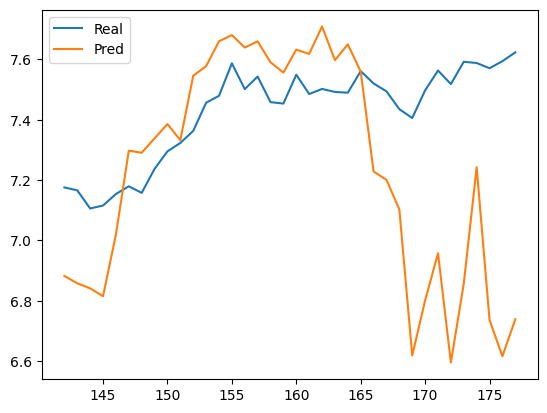

In [31]:
y_pred_train = model.predict(X_test)
y_pred_train

graph = pd.DataFrame({
    "Real": y_test,
    "Pred": np.squeeze(y_pred_train)  # Flatten y_pred_train if needed
})
graph.plot()

In [32]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred_train)
r2 = r2_score(y_test, y_pred_train)

print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

Mean Squared Error: 0.17680244566316303
R^2 Score: -6.122850373047636
